In [1]:
import os
import time
import pandas as pd
import numpy as np
import datetime
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import decomposition
from sklearn.decomposition import LatentDirichletAllocation as LDA
from nltk.corpus import stopwords
from pylab import plt
from matplotlib.pyplot import plot

In [43]:
# # Read the dataset

# dataset = pd.read_csv('label_neu.csv', encoding='utf8')

# # x = datetime.datetime(2019, 1, 11)

# # corpus = dataset[pd.to_datetime(dataset.CreatedTime) > x]

# print('Corpus Read')
# print(len(corpus))

Corpus Read
39749


In [2]:
dataset = pd.read_csv('label_neg.csv', encoding='utf8')
dataset.head(10)
corpus = dataset[dataset['label'] == -1]

print('Negative Corpus Read')
print(len(corpus))
print(corpus)

Negative Corpus Read
39749
                                                   tweet  compound    neg  \
0                                 i am bout sick of yall   -0.5106  0.452   
1      all usaa navy federal members who would like t...   -0.5423  0.226   
2      brooks all usaa navy federal members who would...   -0.5423  0.218   
3                              you all about to upset me   -0.3818  0.342   
4      fuck for withdrawing without my permission and...   -0.6908  0.311   
...                                                  ...       ...    ...   
39744  the new app is absolutely terrible for the iph...   -0.6470  0.091   
39745  after spending over an hour of our lives deali...   -0.4588  0.125   
39746  possibly the worst bank i have ever dealt with...   -0.3178  0.148   
39747  elisibeth davenport weird that this popped up ...   -0.1779  0.159   
39748  we need a branch in palm beach county the bran...   -0.3818  0.055   

         neu    pos  label  
0      0.548  0.000

In [3]:
# Filter short length word

corpus = corpus.tweet.values.astype('U')

count = 0
for document in corpus:
    words_list = document.split()
    ##print(words_list)
    resultwords  = [word for word in words_list if len(word) > 2]
    corpus[count] = ' '.join(resultwords)
    count += 1
    
print(type(corpus))
print(corpus[0])
print(len(corpus))

<class 'numpy.ndarray'>
bout sick yall
39749


In [4]:
## Filter stop word

stop_words = set(stopwords.words('english'))

stop_words.add('navy')
stop_words.add('navyfederal')
stop_words.add('federal')

In [5]:
# Vector

vectorizer = TfidfVectorizer(binary = True, max_features = 7000, stop_words=stop_words, ngram_range = (1,1))

X = vectorizer.fit_transform(corpus)
print(X.toarray())    
print(X.shape)

vocab = np.array(vectorizer.get_feature_names())
print(vocab)
print(len(vocab))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(39749, 7000)
['aaron' 'abandon' 'abandoned' ... 'zombie' 'zombies' 'zone']
7000


In [41]:
# LSA_1
# num_tops = 10
# words_topic = 2
# def show_topics(Vh):
#     top_words = lambda t: [vocab[i] for i in np.argsort(t)[:-words_topic-1:-1]]
#     topic_words = ([top_words(t) for t in Vh])
#     return [' '.join(t) for t in topic_words]

# U, sigma, Vh = decomposition.randomized_svd(X, num_tops)
# print("U:\n", U, "\n")
# print("SIGMA:\n", sigma, "\n")
# print("Vh:\n", Vh, "\n")

# show_topics(Vh)

In [6]:
# lSA_2
svd_model = decomposition.TruncatedSVD(n_components=3, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)

print(len(svd_model.components_))

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(vocab, comp)
    
    sorted_terms = sorted(terms_comp, key=lambda x:x[1], reverse=True)[:7]

    print("\n \n Topic "+str(i)+": ")

    for t in sorted_terms:

        print(t[0], end = ' ')

3

 
 Topic 0: 
money get account bank pay credit cannot 
 
 Topic 1: 
com twitter pic apac defense book mapping 
 
 Topic 2: 
worst ever bank credit service union customer 

In [7]:
# LDA
def build_lda(X, num_of_topics = 3):
    lda = LDA(n_components = num_of_topics, max_iter = 5, learning_method = "online", random_state = 122)
    lda.fit(X)

    return lda

def display_word_distribution(model, feature_names, n_word):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        words = []
        for i in topic.argsort()[:-n_word - 1:-1]:
            words.append(feature_names[i])
        print(words)
        
start = time.time()
number_topics = 4
for i in range(2, number_topics):
    lda_model = build_lda(X, i)
    display_word_distribution(model=lda_model, feature_names=vocab, n_word=10)
    print()

print("Took " + str(time.time()-start) + " to extract topics!")

Topic 0:
['service', 'credit', 'years', 'would', 'bank', 'nfcu', 'customer', 'union', 'one', 'bad']
Topic 1:
['account', 'pay', 'money', 'get', 'card', 'still', 'cannot', 'need', 'problem', 'deposit']

Topic 0:
['ever', 'worst', 'service', 'com', 'hell', 'customer', 'twitter', 'bad', 'pic', 'horrible']
Topic 1:
['pay', 'card', 'credit', 'wrong', 'would', 'use', 'way', 'nfcu', 'bank', 'account']
Topic 2:
['get', 'money', 'account', 'problem', 'call', 'time', 'know', 'still', 'phone', 'deposit']

Took 61.79273986816406 to extract topics!


1 123.8996098193715
2 123.51297336005906
3 122.92340987151523
4 122.58570735735182
5 122.64976913333241
6 122.51161689037593
7 122.55029473648486
8 121.80432320891862
9 121.27422973439123
10 121.13924799680616
11 120.98052754095998
12 123.39848975903664
13 123.36171359756082
14 120.26643063788991
15 120.40613420678613
16 120.0057124462081
17 122.75901539987159
18 119.44792031411576
19 122.05987962896032


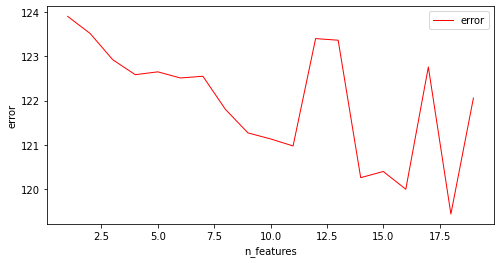

In [8]:
#K-Means
from sklearn.cluster import KMeans

# Finds optimal K
def train(X,vectorizer,true_k=10,showLable = False):
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=10000, n_init=1, verbose=False)
    km.fit(X)
    return km.inertia_ 

true_ks = []
scores = []
for i in range(1,20,1):        
    score = train(X,vectorizer,true_k=i)/len(document)
    print(i,score)
    true_ks.append(i)
    scores.append(score)
plt.figure(figsize=(8,4))
plt.plot(true_ks,scores,label="error",color="red",linewidth=1)
plt.xlabel("n_features")
plt.ylabel("error")
plt.legend()
plt.show()

In [9]:
true_k = 5
clf = KMeans(n_clusters=true_k, init='k-means++', max_iter=1000, n_init=1, verbose=False)
s = clf.fit(X)

#20个中心点
print(len(clf.cluster_centers_))
print(clf.cluster_centers_)
print("---------------------")  


#每个样本所属的簇
i = 1
dic = {}
while i < len(clf.labels_):
    if clf.labels_[i] in dic:
        dic[clf.labels_[i]] += 1
    else:
        dic[clf.labels_[i]] = 1
    i = i + 1
print(dic)
print("---------------------")

print("Top terms per cluster:")
order_centroids = clf.cluster_centers_.argsort()[:, ::-1]
for i in range(true_k):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :15]:
        print(' %s' % vocab[ind], end='')
    print()

5
[[1.85084544e-04 1.28960266e-04 4.79808703e-05 ... 1.21527108e-03
  1.53372337e-03 1.02229027e-04]
 [2.49530784e-04 0.00000000e+00 3.25550479e-04 ... 5.71602353e-04
  5.74262606e-04 0.00000000e+00]
 [7.78566097e-05 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  9.01217752e-05 1.35505632e-04]
 [0.00000000e+00 0.00000000e+00 2.58108638e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 8.11995490e-05 9.91413924e-05 ... 3.17269030e-03
  1.22569229e-03 3.24581029e-04]]
---------------------
{4: 3180, 0: 22666, 2: 9121, 1: 3345, 3: 1436}
---------------------
Top terms per cluster:
Cluster 0: one fuck get shit like would know problem got people hell time bad need sorry
Cluster 1: pay credit union card bills get bill cards use need debt time cash account car
Cluster 2: account bank service app customer get cannot call worst deposit phone nfcu ever time never
Cluster 3: twitter com pic apac defense book telemetry bio mapping brain india president sexual kanchana go

In [10]:
start = time.time()
cluster_id = 3
count = 0
new_corpus = []
for document in corpus:
    if clf.labels_[count] != cluster_id:
        new_corpus.append(document)
    count += 1

new_corpus = np.array(new_corpus)
print(len(new_corpus))

new_vectorizer = TfidfVectorizer(binary = True, max_features = 100000, stop_words=stop_words, ngram_range = (1,1))

new_X = new_vectorizer.fit_transform(new_corpus)

new_vocab = np.array(new_vectorizer.get_feature_names())

max_number_topics = 10
for i in range(2, max_number_topics):
    print('only', i, 'topics: ')
    new_lda_model = build_lda(new_X, i)
    display_word_distribution(model=new_lda_model, feature_names=new_vocab, n_word=10)
    print()

print("Took " + str(time.time()-start) + " to extract topics!")

38313
only 2 topics: 
Topic 0:
['hell', 'sucks', 'lol', 'damn', 'stupid', 'ass', 'wtf', 'suck', 'hate', 'stop']
Topic 1:
['get', 'money', 'account', 'pay', 'credit', 'bank', 'nfcu', 'time', 'one', 'cannot']

only 3 topics: 
Topic 0:
['damn', 'sucks', 'lol', 'smh', 'shit', 'wtf', 'suck', 'bullshit', 'problem', 'crap']
Topic 1:
['account', 'get', 'money', 'pay', 'credit', 'bank', 'nfcu', 'would', 'time', 'one']
Topic 2:
['fuck', 'wrong', 'hell', 'debt', 'direct', 'hate', 'stupid', 'ass', 'mine', 'broke']

only 4 topics: 
Topic 0:
['suck', 'lol', 'bullshit', 'crap', 'wtf', 'fake', 'cut', 'mean', 'damn', 'god']
Topic 1:
['care', 'union', 'poor', 'sucks', 'terrible', 'sorry', 'military', 'credit', 'nfl', 'dead']
Topic 2:
['wrong', 'fuck', 'worst', 'bank', 'something', 'ever', 'get', 'one', 'done', 'smh']
Topic 3:
['account', 'money', 'pay', 'get', 'credit', 'nfcu', 'time', 'cannot', 'would', 'still']

only 5 topics: 
Topic 0:
['unacceptable', 'hold', 'needs', 'absolutely', 'point', 'tired',